# Nueral Network & Deep Learning Notes

### Terminology:

* **Input Layer**: First layer of a nueral network.
* **Output Layer**: Last layer of a nueral network.
* **Hidden Layer(s)**: The layers in-between the input layer and the output layer of a nueral network. Hidden layers can be black-boxes in terms of understanding the inputs and outputs, because we can't directly see goes in and what goes out.
* **Network Width**: How many nuerons are in a layer.
* **Network Depth**: How many total layers there are.


A deep nueral netowrk is a nueral network that contains two or more hidden layers.

### Resources:

* [Universal Approximation Theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem)
* [Activation Functions](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6)

---

### Activation Functions

Activation functions can be defined as `f(z)`, where `z = w(weight) * x(input) + b(bias)`

Often, you will `f(z)` capitalized to `f(Z)` or `X` to denoate a tensor input consisting of mulitple values.

The most simple networks rely on a **basic step function** that outputs 0 or 1, e.g if the value < 0, then output = `0`, and if the ouput is > 0, then the ouput = `1`. This is great for binary classification.

Some other common activation functions:

* **Hyperbolic Tangent**: Outputs between -1 and 1.
* **Rectified Linear Unit(ReLU)**: If the ouput is than 0, treat it as zero. Otherwise, ouput actual z value. Helps with vanishing gradient
---

### Multi-Class Classification Considerations

There are two main types of multi-class situations:

* **Non-Exclusive Classes**: A data point can have multiple classes/categories assigned to it. E.g a photo can have multiple people.
    * Use ***Sigmoid Function*** Activation function, since the output value will be between 0 and 1 (0 as having the class, 1 as not having the class).
* **Mutually Exclusive Classes**: Only one class per data point. E.g a photo can either be black or white.
    * Use ***Softmax Function*** Activation Function, calculates the probability of each target class over all target classes. The range will be 0-1, and the sum of all the prabilities will be equal to 1. the target class with the highest probability "wins".

Multi-Class classification NN's have one neuron in the output layer per unique class.

One Hot Encoding is common for transforming text classes into numeric codes. E.g (Red, Green, Blue) becomes (1, 0, 0) or (1,1,0).

---

### TensorFlow vs Keras

**TensorFlow**:

* Open source DL library developed by Google. TF2 released in 2019.
* Has a large ecosystem of related components, including libraries like Tensorboard, Deployment, & Production API's.

**Keras:

* A high level python library that can use a variety of deep learning libraries underneath, such as TF, CNTK, or Theano.

### Keras Syntax

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

In [3]:
df = pd.read_csv('Data/fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


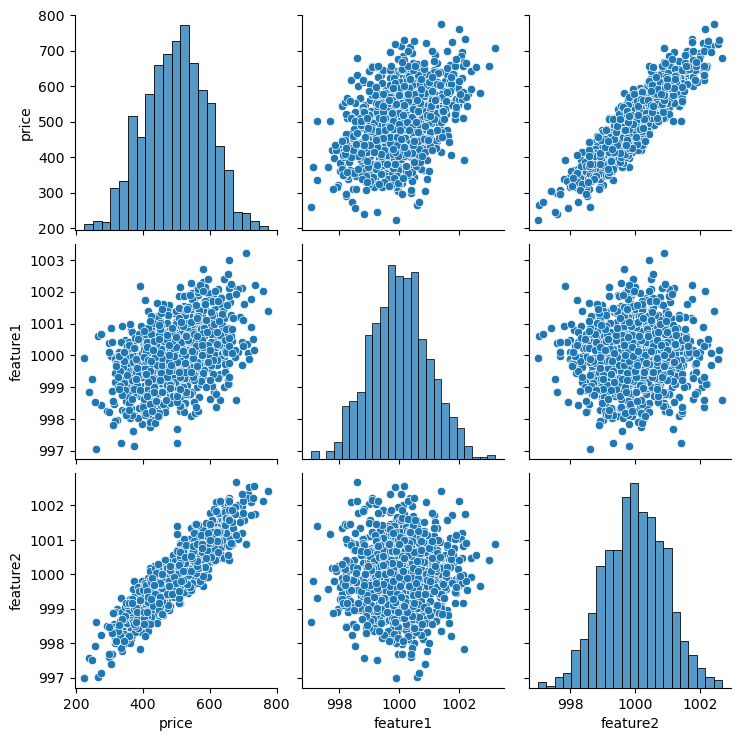

In [4]:
sns.pairplot(df)

In [8]:
from sklearn.model_selection import train_test_split

X = df[['feature1', 'feature2']].values
y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
print(f"Training Data {X_train.shape}")
print(f"Test Data {X_test.shape}")

Training Data (700, 2)
Test Data (300, 2)


In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

In [17]:
help(Sequential)

Help on class Sequential in module keras.src.engine.sequential:

class Sequential(keras.src.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.

In [18]:
help(Dense)

Help on class Dense in module keras.src.layers.core.dense:

class Dense(keras.src.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of t

### Method 1

In [20]:
# model = Sequential([Dense(4, activation="relu"), Dense(2, activation="relu"), Dense(1)])

### Method 2

In [30]:
model = Sequential()

model.add(Dense(4, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1))

model.compile(optimizer="rmsprop", loss='mse')

In [31]:
model.fit(x=X_train, y=y_train, epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 496us/step - loss: 256616.0156
Epoch 2/250
22/22 [==============================] - 0s 503us/step - loss: 256452.9375
Epoch 3/250
22/22 [==============================] - 0s 516us/step - loss: 256276.1094
Epoch 4/250
22/22 [==============================] - 0s 458us/step - loss: 256077.0938
Epoch 5/250
22/22 [==============================] - 0s 382us/step - loss: 255854.8750
Epoch 6/250
22/22 [==============================] - 0s 738us/step - loss: 255607.4062
Epoch 7/250
22/22 [==============================] - 0s 428us/step - loss: 255332.2500
Epoch 8/250
22/22 [==============================] - 0s 389us/step - loss: 255026.7656
Epoch 9/250
22/22 [==============================] - 0s 448us/step - loss: 254690.1250
Epoch 10/250
22/22 [==============================] - 0s 400us/step - loss: 254315.3438
Epoch 11/250
22/22 [==============================] - 0s 400us/step - loss: 253904.2500
Epoch 12/250
22/22 [=====================

22/22 [==============================] - 0s 395us/step - loss: 1600.7739
Epoch 95/250
22/22 [==============================] - 0s 353us/step - loss: 1570.1447
Epoch 96/250
22/22 [==============================] - 0s 402us/step - loss: 1537.0527
Epoch 97/250
22/22 [==============================] - 0s 366us/step - loss: 1505.9706
Epoch 98/250
22/22 [==============================] - 0s 338us/step - loss: 1472.1731
Epoch 99/250
22/22 [==============================] - 0s 345us/step - loss: 1449.3256
Epoch 100/250
22/22 [==============================] - 0s 383us/step - loss: 1413.3029
Epoch 101/250
22/22 [==============================] - 0s 345us/step - loss: 1390.4174
Epoch 102/250
22/22 [==============================] - 0s 384us/step - loss: 1359.4149
Epoch 103/250
22/22 [==============================] - 0s 338us/step - loss: 1326.2987
Epoch 104/250
22/22 [==============================] - 0s 350us/step - loss: 1296.9321
Epoch 105/250
22/22 [==============================] - 0s 352u

22/22 [==============================] - 0s 384us/step - loss: 27.9770
Epoch 190/250
22/22 [==============================] - 0s 369us/step - loss: 27.0490
Epoch 191/250
22/22 [==============================] - 0s 354us/step - loss: 26.7979
Epoch 192/250
22/22 [==============================] - 0s 370us/step - loss: 26.5899
Epoch 193/250
22/22 [==============================] - 0s 337us/step - loss: 25.6299
Epoch 194/250
22/22 [==============================] - 0s 341us/step - loss: 25.6766
Epoch 195/250
22/22 [==============================] - 0s 346us/step - loss: 25.2068
Epoch 196/250
22/22 [==============================] - 0s 342us/step - loss: 25.1435
Epoch 197/250
22/22 [==============================] - 0s 336us/step - loss: 25.2566
Epoch 198/250
22/22 [==============================] - 0s 344us/step - loss: 24.6352
Epoch 199/250
22/22 [==============================] - 0s 337us/step - loss: 24.5051
Epoch 200/250
22/22 [==============================] - 0s 349us/step - loss: 24

<Axes: >

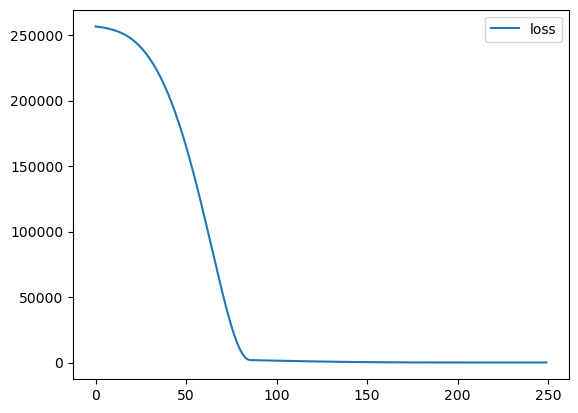

In [32]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Model Evaluation

In [33]:
model.evaluate(X_test, y_test, verbose=0)

26.817180633544922

In [35]:
model.evaluate(X_train,y_train,verbose=0)

26.963361740112305

In [45]:
test_predictions = model.predict(X_test)
test_predictions = pd.Series(test_predictions.reshape(300,))

pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)

pred_df.columns = ['Test True Y', 'Model Predictions']

pred_df

10/10 [==============================] - 0s 720us/step


,Test True Y,Model Predictions
0,402.296319,404.008453
1,624.156198,621.832031
2,582.455066,590.471741
3,578.588606,570.650635
4,371.224104,365.471466
...,...,...
295,525.704657,527.549133
296,502.909473,513.934326
297,612.727910,607.964417
298,417.569725,415.622467


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

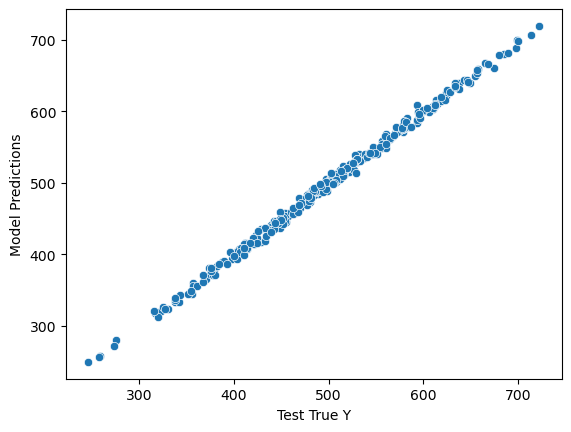

In [46]:
sns.scatterplot(x="Test True Y", y='Model Predictions', data=pred_df)

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [49]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

4.162836572498853

In [50]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [52]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

26.81718652142489

### Predict On Brand New Set of Data

In [53]:
new_gem = [[998, 1000]]
new_gem = scaler.transform(new_gem)
model.predict(new_gem)

1/1 [==============================] - 0s 14ms/step


array([[418.43362]], dtype=float32)

### Save Model

In [54]:
from tensorflow.keras.models import load_model

In [60]:
model.save('my_gem_model.h5')

In [61]:
later_model = load_model('my_gem_model.h5')

In [62]:
later_model.predict(new_gem)

1/1 [==============================] - 0s 39ms/step


array([[418.43362]], dtype=float32)